<a href="https://colab.research.google.com/github/LeoFRMoraes/Produ-o-Mercado-de-Peixe-2020/blob/main/Produ%C3%A7%C3%A3o_Mercado_de_Peixe_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Caminhos para os arquivos CSV
arquivo1 = '/content/Entradas mercado 2020.csv'
arquivo2 = '/content/Entradas mercado 2020 cont.csv'

# Como o pandas não estava conseguindo ler os arquivos, tentei diferentes codificações até encontrar a correta
try:
    entradas_2020 = pd.read_csv(arquivo1, encoding='utf-8', sep=';', dtype=str)
except UnicodeDecodeError:
    entradas_2020 = pd.read_csv(arquivo1, encoding='latin1', sep=';', dtype=str)

try:
    entradas_2020_cont = pd.read_csv(arquivo2, encoding='utf-8', sep=';', dtype=str)
except UnicodeDecodeError:
    entradas_2020_cont = pd.read_csv(arquivo2, encoding='latin1', sep=';', dtype=str)

entradas_2020_cont





,Id,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Unnamed: 7,Unnamed: 8
0,1,28/07/20,3 Irmãos ref. Fernando Cris,porquinho,"21,0",NaN,NaN,NaN,NaN
1,2,28/07/20,3 Irmãos ref. Fernando Cris,lulinha,"0,5",NaN,NaN,NaN,NaN
2,3,28/07/20,3 Irmãos ref. Fernando Cris,polvo,"4,5",NaN,NaN,NaN,NaN
3,4,28/07/20,3 Irmãos ref. Fernando Cris,siri,"3,0",NaN,NaN,NaN,NaN
4,5,28/07/20,3 Irmãos ref. Fernando Cris,mistura,"6,5",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1048570,1042630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,1042631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,1042632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,1042633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
entradas_2020

,Id,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Unnamed: 7,Unnamed: 8
0,1,02/01/20,Monte Sião,7B,"7,0",NaN,NaN,NaN,NaN
1,2,02/01/20,Geremias,marisco limpo,"7,0",NaN,NaN,NaN,NaN
2,3,02/01/20,Geremias,marisco c/ casca,"25,0",NaN,NaN,NaN,NaN
3,4,02/01/20,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN,NaN,NaN
4,5,02/01/20,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1048570,1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,1048575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Juntando as tabelas
entradas_total_2020 = pd.concat([entradas_2020, entradas_2020_cont], ignore_index=True)

# Remover linhas onde todos os registros são NaN (com excessão do ID)
entradas_total_2020 = entradas_total_2020.dropna(subset = entradas_total_2020.columns.difference(['Id']), how='all')

entradas_total_2020.tail()

,Id,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Unnamed: 7,Unnamed: 8
1054198,5624,31/12/2020,camandante França ref.Marcelo Filho,mistura,"21,0",NaN,NaN,NaN,NaN
1054199,5625,31/12/2020,camandante França ref.Marcelo Filho,linguado p,"13,0",NaN,NaN,NaN,NaN
1054200,5626,31/12/2020,Sea Mariko,7B,"84,0",NaN,NaN,NaN,NaN
1054201,5627,31/12/2020,Vraxo,rosa g,"4,0",NaN,NaN,NaN,NaN
1054202,5628,31/12/2020,Vraxo,rosa g,"3,0",NaN,NaN,NaN,NaN


In [4]:
# Redefinir o índice para a coluna ID
entradas_total_2020.set_index('Id', inplace=True)

# Remover a coluna index
if 'index' in entradas_total_2020.columns:
    entradas_total_2020.drop(columns=['index'], inplace=True)

# Criar uma contagem contínua para o índice
entradas_total_2020.reset_index(drop=True, inplace=True)

entradas_total_2020


,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Unnamed: 7,Unnamed: 8
0,02/01/20,Monte Sião,7B,"7,0",NaN,NaN,NaN,NaN
1,02/01/20,Geremias,marisco limpo,"7,0",NaN,NaN,NaN,NaN
2,02/01/20,Geremias,marisco c/ casca,"25,0",NaN,NaN,NaN,NaN
3,02/01/20,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN,NaN,NaN
4,02/01/20,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11557,31/12/2020,camandante França ref.Marcelo Filho,mistura,"21,0",NaN,NaN,NaN,NaN
11558,31/12/2020,camandante França ref.Marcelo Filho,linguado p,"13,0",NaN,NaN,NaN,NaN
11559,31/12/2020,Sea Mariko,7B,"84,0",NaN,NaN,NaN,NaN
11560,31/12/2020,Vraxo,rosa g,"4,0",NaN,NaN,NaN,NaN


In [5]:
# Remover as colunas sem registros
entradas_total_2020.drop(columns=['Unnamed: 7', 'Unnamed: 8'], inplace=True)
entradas_total_2020

,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,02/01/20,Monte Sião,7B,"7,0",NaN,NaN
1,02/01/20,Geremias,marisco limpo,"7,0",NaN,NaN
2,02/01/20,Geremias,marisco c/ casca,"25,0",NaN,NaN
3,02/01/20,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN
4,02/01/20,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...
11557,31/12/2020,camandante França ref.Marcelo Filho,mistura,"21,0",NaN,NaN
11558,31/12/2020,camandante França ref.Marcelo Filho,linguado p,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,7B,"84,0",NaN,NaN
11560,31/12/2020,Vraxo,rosa g,"4,0",NaN,NaN


In [6]:
# Verificar a contagem, nulos e dtypes do df
entradas_total_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data Pesca        11562 non-null  object
 1   Embarcação        11424 non-null  object
 2   Espécie           11404 non-null  object
 3   Qtd(Kg)           11524 non-null  object
 4   Valor(R$)         0 non-null      object
 5   Valor Total (R$)  0 non-null      object
dtypes: object(6)
memory usage: 542.1+ KB


In [7]:
# Verificar dados duplicados
duplicados = entradas_total_2020[entradas_total_2020.duplicated()]
duplicados


,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
66,04/01/20,Monte Sião,7B,"7,0",NaN,NaN
316,09/01/20,Maria Vitoria,7B,"15,0",NaN,NaN
319,09/01/20,Fernando Cris ref. Jeremias,7B,"10,0",NaN,NaN
333,09/01/20,Vraxo,7B,"5,0",NaN,NaN
364,10/01/20,Maria Vitoria,7B,"18,0",NaN,NaN
...,...,...,...,...,...,...
11280,26/12/2020,Vraxo,rosa p,"4,0",NaN,NaN
11328,28/12/2020,Vraxo,rosa p,"5,0",NaN,NaN
11360,29/12/2020,Vraxo,rosa p,"4,0",NaN,NaN
11443,30/12/2020,Vraxo,rosa p,"5,0",NaN,NaN


In [8]:
# Remover os dados duplicados (depois de confirmar que realmente são dados duplicados)
entradas_total_2020 = entradas_total_2020.drop_duplicates()



In [9]:
# Converter a coluna 'Data Pesca' para datetime
entradas_total_2020['Data Pesca'] = pd.to_datetime(entradas_total_2020['Data Pesca'], errors='coerce')

# Preencher os valores NaN na coluna 'Data Pesca' com a data da linha anterior
entradas_total_2020['Data Pesca'] = entradas_total_2020['Data Pesca'].fillna(method='ffill')

# Formatar as datas para o formato brasileiro
entradas_total_2020['Data Pesca'] = entradas_total_2020['Data Pesca'].dt.strftime('%d/%m/%Y')

entradas_total_2020

<ipython-input-9-39d18196982a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  entradas_total_2020['Data Pesca'] = pd.to_datetime(entradas_total_2020['Data Pesca'], errors='coerce')
<ipython-input-9-39d18196982a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Data Pesca'] = pd.to_datetime(entradas_total_2020['Data Pesca'], errors='coerce')
<ipython-input-9-39d18196982a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,7B,"7,0",NaN,NaN
1,01/02/2020,Geremias,marisco limpo,"7,0",NaN,NaN
2,01/02/2020,Geremias,marisco c/ casca,"25,0",NaN,NaN
3,01/02/2020,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN
4,01/02/2020,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...
11556,31/12/2020,camandante França ref.Marcelo Filho,arraia,"8,0",NaN,NaN
11557,31/12/2020,camandante França ref.Marcelo Filho,mistura,"21,0",NaN,NaN
11558,31/12/2020,camandante França ref.Marcelo Filho,linguado p,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,7B,"84,0",NaN,NaN


In [10]:
# Verificar valores unicos
entradas_total_2020['Embarcação'].unique()

array(['Monte Sião', 'Geremias', 'Varão de Guerra - Ref Cabocla',
       'Aguia de Aia', 'Aguia de Aia - Ref Genimar', '3 Irmãos', 'Vraxo',
       'JR', 'Sorriso', 'Adilmar', 'Fabio Jr', 'Maria Vitoria',
       'Dom Miguel Ref. Adilmar', 'Geremias ref. Fabio Jr.', 'Halley',
       'Fabiola Vanessa', '3 Irmãos ref. Gisele', 'Trimar',
       'Halley ref. Curumim', 'Edinho', 'Varão de Guerra',
       'Fabio Jr ref. Geremias 33', nan, 'Ilha Vence',
       'Edinho ref. Rosa de Saron', 'Jeremias', 'Marcelo Filho',
       'Kalu Kalu', 'Maria Eduarda', 'Sea Mariko', 'Fabio Junior',
       'Fernando Cris', 'Mestre Vitor', 'Varão de guerra',
       'Pequeno Principe ', 'Àguia de Aia', 'Almada',
       'Pequeno Principe ref. Visão do Futuro', 'Independência', 'Mirim',
       'Dom João', 'Ana Carolina', 'S.T.B', 'Ancora do mar', 'Pai Eterno',
       'Princesa da ilha', 'Rei do Mar ref.', 'Pilatos', 'Tapajós',
       'almada', 'Marcelo Filho ( rafael)',
       '3 Irmãos ref. Marcelo filho rafael', 

In [11]:
# Para melhorar a funcionalidade da tabela, vou separar a coluna "Embarcação" em duas colunas (antes e depois de Ref.)
def separate_embarcacao(embarcacao):
    if isinstance(embarcacao, str):
        match = re.search(r'(.+)\s*(?:-|ref\.?|REF\.?)\s*(.+)', embarcacao, flags=re.IGNORECASE)
        if match:
            return match.group(1).strip(), match.group(2).strip()
    return embarcacao, ''



In [12]:
# Aplicar a função à coluna "Embarcação"
import re
entradas_total_2020['Embarcação'], entradas_total_2020['Ref.'] = zip(*entradas_total_2020['Embarcação'].apply(separate_embarcacao))

# Mostrar as primeiras linhas do DF para confirmar as alterações
entradas_total_2020.head()


<ipython-input-12-fc2e56134602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Embarcação'], entradas_total_2020['Ref.'] = zip(*entradas_total_2020['Embarcação'].apply(separate_embarcacao))
<ipython-input-12-fc2e56134602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Embarcação'], entradas_total_2020['Ref.'] = zip(*entradas_total_2020['Embarcação'].apply(separate_embarcacao))


,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Ref.
0,01/02/2020,Monte Sião,7B,"7,0",NaN,NaN,
1,01/02/2020,Geremias,marisco limpo,"7,0",NaN,NaN,
2,01/02/2020,Geremias,marisco c/ casca,"25,0",NaN,NaN,
3,01/02/2020,Varão de Guerra -,7B,"111,0",NaN,NaN,Cabocla
4,01/02/2020,Varão de Guerra -,branco,"1,2",NaN,NaN,Cabocla


In [13]:
# Obter o índice da coluna "Embarcação" para mover a coluna "Ref."
indice_embarcacao = entradas_total_2020.columns.get_loc("Embarcação")

# Insira a coluna 'Ref.' após a coluna 'Embarcação'
entradas_total_2020.insert(indice_embarcacao + 1, 'Ref.', entradas_total_2020.pop('Ref.'))

entradas_total_2020

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,7B,"7,0",NaN,NaN
1,01/02/2020,Geremias,,marisco limpo,"7,0",NaN,NaN
2,01/02/2020,Geremias,,marisco c/ casca,"25,0",NaN,NaN
3,01/02/2020,Varão de Guerra -,Cabocla,7B,"111,0",NaN,NaN
4,01/02/2020,Varão de Guerra -,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
11556,31/12/2020,camandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
11557,31/12/2020,camandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
11558,31/12/2020,camandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,,7B,"84,0",NaN,NaN


In [14]:
# Função para padronizar nomes da embarcações
def corrigir_nomes(nome):
    if isinstance(nome, str):
        # Separar palavras
        palavras = re.findall(r'\b\w+\b', nome)
        # Corrigir cada palavra para ter a primeira letra maiúscula
        palavras_corrigidas = [palavra.capitalize() for palavra in palavras]
        # Juntar as palavras corrigidas de volta em uma string
        nome_corrigido = ' '.join(palavras_corrigidas)
        return nome_corrigido
    else:
        return nome

# Aplicar a função aos nomes nas colunas "Embarcação" e "Ref."
entradas_total_2020['Embarcação'] = entradas_total_2020['Embarcação'].apply(corrigir_nomes)
entradas_total_2020['Ref.'] = entradas_total_2020['Ref.'].apply(corrigir_nomes)

entradas_total_2020

<ipython-input-14-965a871f3159>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Embarcação'] = entradas_total_2020['Embarcação'].apply(corrigir_nomes)
<ipython-input-14-965a871f3159>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Ref.'] = entradas_total_2020['Ref.'].apply(corrigir_nomes)


,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,7B,"7,0",NaN,NaN
1,01/02/2020,Geremias,,marisco limpo,"7,0",NaN,NaN
2,01/02/2020,Geremias,,marisco c/ casca,"25,0",NaN,NaN
3,01/02/2020,Varão De Guerra,Cabocla,7B,"111,0",NaN,NaN
4,01/02/2020,Varão De Guerra,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
11556,31/12/2020,Camandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
11557,31/12/2020,Camandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
11558,31/12/2020,Camandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,,7B,"84,0",NaN,NaN


In [15]:
pip install fuzzywuzzy

In [16]:
#Registros das Embarcações apresentam muitas variasções de escrita, vou criar um dicionário com os nomes escritos corretamente
palavras_corretas = [ '3 Irmãos', 'Adilmar', 'Águia De Aia', 'Almada I', 'Ana Carolina', 'Âncora Do Mar', 'Aruanã',
                     'Astro Rei', 'Comandante Fabio Junior', 'Cabocla', 'Comandante França','Carina Flutuante',
                      'Connal', 'Dom João', 'Dom Miguel III', 'Edinho', 'Elisangela', 'Esperança', 'Fabiola Vanessa',
                      'Fernando Cris', 'Sea Mariko', 'Genimar', 'Geremias', 'Gunnar Vingren', 'Halley', 'Ilha Vence',
                      'Independência', 'J B', 'J R', 'Gigante', 'Kahana Pai', 'Kalu Kalu', 'Karina', 'M R', 'Maria Vitoria',
                       'Marcelo Filho', 'Manto Azul', 'Marcelo Filho I', 'Maria Eduarda', 'Menino Do Rio',
                      'Mestre Vitor', 'Mirim', 'Monte Sião', 'Obrigado Senhor', 'Onduleiro', 'Pai Eterno', 'Pegasus',
                      'Pequeno Principe', 'Pequeno Principe I', 'Pilatos', 'Princesa Da Ilha', 'Promirim', 'Rodrimar',
                      'Rei Do Mar', 'Rosa De Sarom', 'Se Tu Uma Benção', 'Santa Fé', 'Santiago', 'Sorriso', 'Tapajos',
                       'Trimar', 'Varão De Guerra', 'Victorioso', 'Visão Do Futuro', 'Vraxo'
                     ]

In [18]:
from fuzzywuzzy import process

# Converter os valores da coluna 'Embarcação' para strings
entradas_total_2020['Embarcação'] = entradas_total_2020['Embarcação'].astype(str)


# Função para encontrar a melhor correspondência de nome incorretos na col. 'Embarcação' em uma lista de palavras corretas
def encontrar_correspondencia(palavra_incorreta, palavras_corretas):
    melhor_correspondencia, _ = process.extractOne(palavra_incorreta, palavras_corretas)
    return melhor_correspondencia

# Aplicar a função de correspondência a cada registro na coluna 'Embarcação'
entradas_total_2020['Embarcação'] = entradas_total_2020['Embarcação'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas))

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
<ipython-input-18-fe342e5792b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Embarcação'] = entradas_total_2020['Embarcação'].astype(str)
<ipython-input-18-fe342e5792b5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [19]:
entradas_total_2020

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,7B,"7,0",NaN,NaN
1,01/02/2020,Geremias,,marisco limpo,"7,0",NaN,NaN
2,01/02/2020,Geremias,,marisco c/ casca,"25,0",NaN,NaN
3,01/02/2020,Varão De Guerra,Cabocla,7B,"111,0",NaN,NaN
4,01/02/2020,Varão De Guerra,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
11556,31/12/2020,Comandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
11557,31/12/2020,Comandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
11558,31/12/2020,Comandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,,7B,"84,0",NaN,NaN


In [20]:
from fuzzywuzzy import process

# Fiz o mesmo processo anterior para coluna "Espécies", criando uma lista de espécies corretas
palavras_corretas = ['Abrotéa','Arraia', 'Anchova' , 'Bagre', 'Baiacu' ,'Betara', 'Bicuda' , 'Bonito', 'Cação',
                     'Caçonete', 'Camarão 7B', 'Camarão 7B limpo','Camarão 7B s/ cabeça',
                     'Camarão Branco', 'Camarão Branco limpo', 'Camarão Branco s/ cabeça','Camarão Rosa G',
                     'Camarão Rosa M','Camarão Rosa P', 'Camarão Rosa Pistola', 'Camarão Rosa s/ cabeça',
                     'Cambeva', 'Carapau', 'Carapeva', 'Castanha', 'Cavala', 'Congro Rosa', 'Corvina', 'Corvinota',
                     'Dourado', 'Garoupa', 'Goete', 'Guaivira', 'Jangolengo', 'Lagosta', 'Lagostim', 'Linguado',
                     'Lula', 'Lula limpa', 'Lulinha', 'Marisco', 'Marisco limpo', 'Mistura', 'Namorado', 'Olhete',
                     'Olho de Boi', 'Olhudo', 'Palombeta', 'Pampo', 'Panaguariu', 'Parati', 'Pargo', 'Paru',
                     'Peixe Cabra', 'Peixe Espada', 'Peixe Galo', 'Peixe Maria Luiza', 'Peixe Maria Mole',
                     'Peixe Sapo', 'Pescada', 'Pescada Branca', 'Pescada Cambucu', 'Pescadinha', 'Pirajica',
                     'Polvo', 'Porquinho', 'Prejereba', 'Robalo', 'Salema', 'Savelha', 'Siri', 'Sororoca',
                     'Tainha', 'Tira Vira', 'Trilha', 'Vermelho', 'Xaréu', 'Xaréu Branco']


In [21]:
# Converter os valores da coluna 'Espécie' para strings
entradas_total_2020['Espécie'] = entradas_total_2020['Espécie'].astype(str)

# Função para encontrar a melhor correspondência para uma palavra incorreta em uma lista de espécies corretas
def encontrar_correspondencia(palavra_incorreta, palavras_corretas):
    melhor_correspondencia, _ = process.extractOne(palavra_incorreta, palavras_corretas)
    return melhor_correspondencia

# Aplicar a função de correspondência a cada palavra na coluna 'Especie'
entradas_total_2020['Espécie'] = entradas_total_2020['Espécie'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas))


<ipython-input-21-96760acd60d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Espécie'] = entradas_total_2020['Espécie'].astype(str)
<ipython-input-21-96760acd60d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Espécie'] = entradas_total_2020['Espécie'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas))


In [22]:
entradas_total_2020

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,Camarão 7B,"7,0",NaN,NaN
1,01/02/2020,Geremias,,Marisco limpo,"7,0",NaN,NaN
2,01/02/2020,Geremias,,Marisco,"25,0",NaN,NaN
3,01/02/2020,Varão De Guerra,Cabocla,Camarão 7B,"111,0",NaN,NaN
4,01/02/2020,Varão De Guerra,Cabocla,Camarão Branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
11556,31/12/2020,Comandante França,Marcelo Filho,Arraia,"8,0",NaN,NaN
11557,31/12/2020,Comandante França,Marcelo Filho,Mistura,"21,0",NaN,NaN
11558,31/12/2020,Comandante França,Marcelo Filho,Linguado,"13,0",NaN,NaN
11559,31/12/2020,Sea Mariko,,Camarão 7B,"84,0",NaN,NaN


In [23]:
# Substituir vírgulas por pontos na coluna 'Qtd(Kg)' para converter a coluna para float
entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].str.replace(',', '.')



<ipython-input-23-36085bbb5900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].str.replace(',', '.')


In [24]:
# Existe algum registro que não pode ser convertido para float, converter para string para tratar valores não numéricos
entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].astype(str)

# Lista para armazenar os valores que não são números
valores_nao_numericos = []

# Testar os valores na coluna 'Qtd(Kg)' para verificatr os que não são números
for valor in entradas_total_2020['Qtd(Kg)']:
    try:
        # Tentar converter o valor para float
        float(valor)
    except ValueError:
        # Se ocorrer um erro, o valor não é um número
        valores_nao_numericos.append(valor)

# Mostrar os valores que não são números
print(valores_nao_numericos)

['7B limpo']


<ipython-input-24-ba9fd0261ad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].astype(str)


In [25]:
# Substituir sting por um valor numérico
entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].replace('7B limpo', '0')

# Converter as colunas para o tipo float
entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].astype(float)
entradas_total_2020['Valor(R$)'] = entradas_total_2020['Valor(R$)'].astype(float)

entradas_total_2020['Qtd(Kg)']

<ipython-input-25-1ef3c51fdbda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].replace('7B limpo', '0')
<ipython-input-25-1ef3c51fdbda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Qtd(Kg)'] = entradas_total_2020['Qtd(Kg)'].astype(float)
<ipython-input-25-1ef3c51fdbda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


0          7.0
1          7.0
2         25.0
3        111.0
4          1.2
         ...  
11556      8.0
11557     21.0
11558     13.0
11559     84.0
11560      4.0
Name: Qtd(Kg), Length: 11373, dtype: float64

In [26]:
# Criar um dicionário para incluir os valores de cada espécie
valores_por_especie = {
                     'Abrotéa': 25,'Arraia': 30, 'Anchova': 35 , 'Bagre': 20, 'Baiacu': 25,'Betara': 28,
                     'Bicuda': 22 , 'Bonito': 20, 'Cação': 35, 'Caçonete': 22, 'Camarão 7B': 45,
                     'Camarão 7B limpo': 65,'Camarão 7B s/ cabeça': 55, 'Camarão Branco': 75,
                     'Camarão Branco limpo': 110, 'Camarão Branco s/ cabeça': 95,'Camarão Rosa G': 130,
                     'Camarão Rosa M':100,'Camarão Rosa P': 85, 'Camarão Rosa Pistola': 150,
                     'Camarão Rosa s/ cabeça': 150,'Cambeva': 26, 'Carapau': 18, 'Carapeva': 22, 'Castanha': 30,
                     'Cavala': 35, 'Congro Rosa': 65, 'Corvina': 18, 'Corvinota': 12, 'Dourado': 35, 'Garoupa':60,
                     'Goete': 24, 'Guaivira': 28, 'Jangolengo': 22, 'Lagosta': 120, 'Lagostim': 85, 'Linguado': 40,
                     'Lula': 45, 'Lula limpa': 60, 'Lulinha': 30, 'Marisco': 15, 'Marisco limpo': 40, 'Mistura': 15,
                     'Namorado': 38, 'Olhete': 42,  'Olho de Boi': 38, 'Olhudo': 35, 'Palombeta': 28, 'Pampo': 28,
                     'Panaguariu': 32, 'Parati': 20, 'Pargo': 30, 'Paru': 25, 'Peixe Cabra': 27, 'Peixe Espada': 33,
                     'Peixe Galo': 30, 'Peixe Maria Luiza': 20, 'Peixe Maria Mole': 22, 'Peixe Sapo': 18,
                     'Pescada': 30, 'Pescada Branca': 35, 'Pescada Cambucu': 40, 'Pescadinha': 18, 'Pirajica': 25,
                     'Polvo': 65, 'Porquinho': 25, 'Prejereba': 26, 'Robalo': 62, 'Salema': 28, 'Savelha': 25,
                     'Siri': 55, 'Sororoca': 38, 'Tainha': 35, 'Tira Vira': 22, 'Trilha': 20, 'Vermelho': 45,
                     'Xaréu': 38, 'Xaréu Branco': 45}


# Atualizar os valores na coluna "Valor(R$)" com base na espécie correspondente
entradas_total_2020['Valor(R$)'] = entradas_total_2020['Espécie'].map(valores_por_especie)

# Calcular o valor total para cada entrada
entradas_total_2020['Valor Total (R$)'] = entradas_total_2020['Qtd(Kg)'] * entradas_total_2020['Valor(R$)']

# Visualizar o DataFrame atualizado
entradas_total_2020

<ipython-input-26-b89981419a38>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Valor(R$)'] = entradas_total_2020['Espécie'].map(valores_por_especie)
<ipython-input-26-b89981419a38>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Valor Total (R$)'] = entradas_total_2020['Qtd(Kg)'] * entradas_total_2020['Valor(R$)']


,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,Camarão 7B,7.0,45,315.0
1,01/02/2020,Geremias,,Marisco limpo,7.0,40,280.0
2,01/02/2020,Geremias,,Marisco,25.0,15,375.0
3,01/02/2020,Varão De Guerra,Cabocla,Camarão 7B,111.0,45,4995.0
4,01/02/2020,Varão De Guerra,Cabocla,Camarão Branco,1.2,75,90.0
...,...,...,...,...,...,...,...
11556,31/12/2020,Comandante França,Marcelo Filho,Arraia,8.0,30,240.0
11557,31/12/2020,Comandante França,Marcelo Filho,Mistura,21.0,15,315.0
11558,31/12/2020,Comandante França,Marcelo Filho,Linguado,13.0,40,520.0
11559,31/12/2020,Sea Mariko,,Camarão 7B,84.0,45,3780.0


In [27]:
# Definir a função para mapear as espécies para classificação
def classificar_especie(especie):
    crustaceos = ['Camarão', 'Siri', 'Lasgota', 'Lagostim']
    moluscos = ['Marisco', 'Mexilhão', 'Polvo', 'Lula', 'Lulinha']
    elasmobranquios = ['Cação', 'Arraia', 'Caçonete']

    # Extrair o termo principal da coluna 'Espécie'
    termo_principal = especie.split()[0]

    if any(crustaceo in termo_principal for crustaceo in crustaceos):
        return 'Crustáceos'
    elif any(molusco in termo_principal for molusco in moluscos):
        return 'Moluscos'
    elif any(elasmobranquio in termo_principal for elasmobranquio in elasmobranquios):
        return 'Elasmobrânquios'
    else:
        return 'Peixes'

# Criar a coluna 'Classificação'
entradas_total_2020['Classificação'] = entradas_total_2020['Espécie'].apply(classificar_especie)

# Inserir a coluna 'Classificação' após a coluna 'Espécie'
coluna_especie_index = entradas_total_2020.columns.get_loc('Espécie')
entradas_total_2020.insert(coluna_especie_index + 1, 'Classificação', entradas_total_2020.pop('Classificação'))

entradas_total_2020.head()


<ipython-input-27-442f392856bc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradas_total_2020['Classificação'] = entradas_total_2020['Espécie'].apply(classificar_especie)


,Data Pesca,Embarcação,Ref.,Espécie,Classificação,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,Camarão 7B,Crustáceos,7.0,45,315.0
1,01/02/2020,Geremias,,Marisco limpo,Moluscos,7.0,40,280.0
2,01/02/2020,Geremias,,Marisco,Moluscos,25.0,15,375.0
3,01/02/2020,Varão De Guerra,Cabocla,Camarão 7B,Crustáceos,111.0,45,4995.0
4,01/02/2020,Varão De Guerra,Cabocla,Camarão Branco,Crustáceos,1.2,75,90.0


In [69]:
#Reumo do Dataframe
entradas_total_2020.describe()

,Qtd(Kg),Valor(R$),Valor Total (R$),Qtd(Ton)
count,11336.000000,11373.000000,11336.000000,11336.000000
mean,29.017381,48.024092,1383.309726,0.029017
std,70.448034,29.958632,6018.759570,0.070448
min,0.000000,12.000000,0.000000,0.000000
25%,5.500000,25.000000,220.000000,0.005500
50%,13.800000,40.000000,510.000000,0.013800
75%,28.000000,65.000000,1250.000000,0.028000
max,1700.000000,150.000000,409500.000000,1.700000


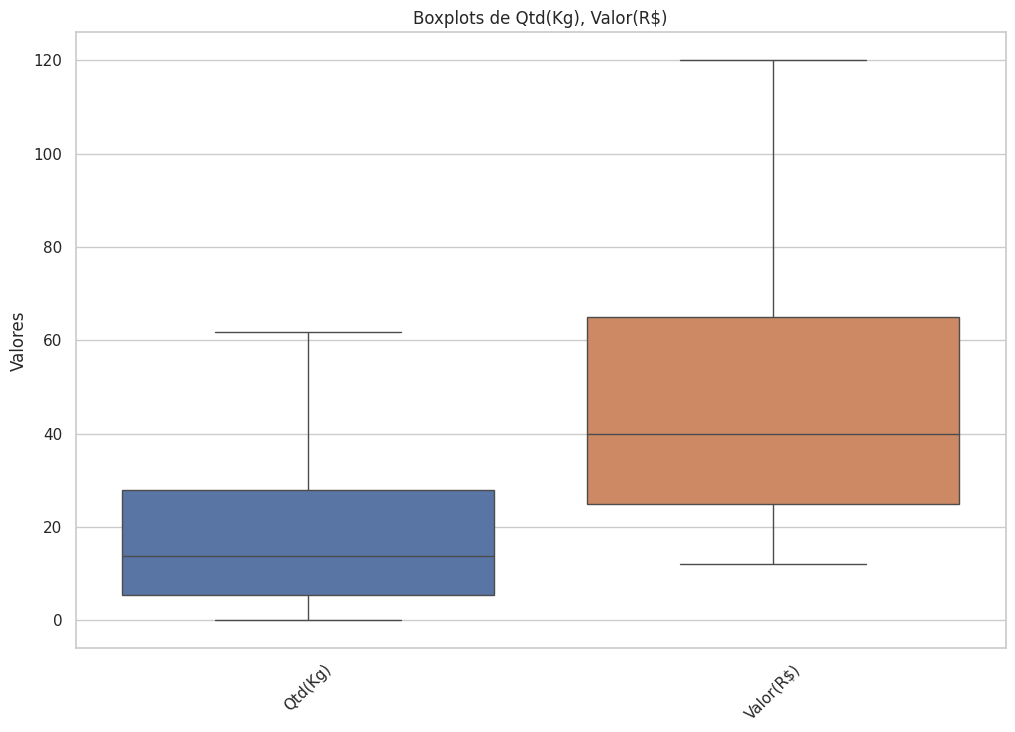

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar boxplots para as colunas Qtd(kg) e Valor(R$) para verificar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=entradas_total_2020[['Qtd(Kg)', 'Valor(R$)']], showfliers=False)
plt.title('Boxplots de Qtd(Kg), Valor(R$)')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Identificar os valores extremos (provavelmente erros de digitação)
valores_extremos = entradas_total_2020[entradas_total_2020['Qtd(Kg)'] > 2000]

# Substituir os valores extremos pela média da quantidade para a respectiva espécie, desconsiderando o valor extremo da média
for index, row in valores_extremos.iterrows():
    # Calcular a média da quantidade para a respectiva espécie, excluindo os outliers
    especie = row['Espécie']
    media_sem_extremo = entradas_total_2020[(entradas_total_2020['Espécie'] == especie) & (entradas_total_2020['Qtd(Kg)'] <= 1000)]['Qtd(Kg)'].mean()

    # Substituir os outliers pela média
    entradas_total_2020.at[index, 'Qtd(Kg)'] = media_sem_extremo


entradas_total_2020


,Data Pesca,Embarcação,Ref.,Espécie,Classificação,Qtd(Kg),Valor(R$),Valor Total (R$)
0,01/02/2020,Monte Sião,,Camarão 7B,Crustáceos,7.0,45,315.0
1,01/02/2020,Geremias,,Marisco limpo,Moluscos,7.0,40,280.0
2,01/02/2020,Geremias,,Marisco,Moluscos,25.0,15,375.0
3,01/02/2020,Varão De Guerra,Cabocla,Camarão 7B,Crustáceos,111.0,45,4995.0
4,01/02/2020,Varão De Guerra,Cabocla,Camarão Branco,Crustáceos,1.2,75,90.0
...,...,...,...,...,...,...,...,...
11556,31/12/2020,Comandante França,Marcelo Filho,Arraia,Elasmobrânquios,8.0,30,240.0
11557,31/12/2020,Comandante França,Marcelo Filho,Mistura,Peixes,21.0,15,315.0
11558,31/12/2020,Comandante França,Marcelo Filho,Linguado,Peixes,13.0,40,520.0
11559,31/12/2020,Sea Mariko,,Camarão 7B,Crustáceos,84.0,45,3780.0


<ipython-input-71-51c924d582e2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qtd(Ton)', y='Espécie', data=quantidade_total_por_especie, palette='viridis')


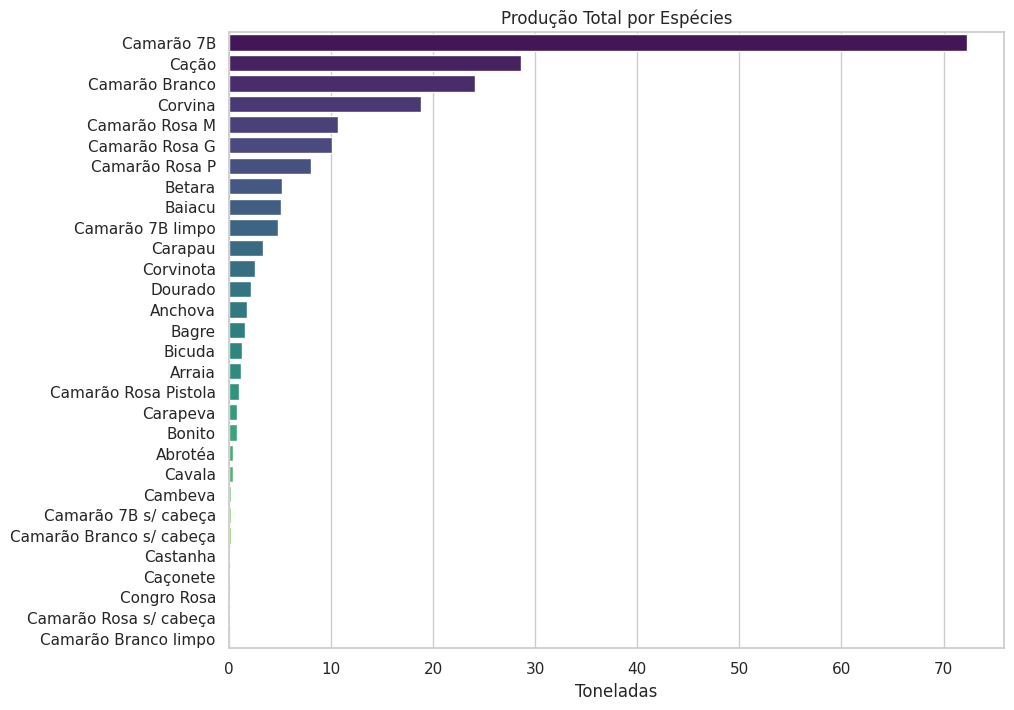

In [71]:
#Agora vamos criar algumas visualiações em cima da base de dados tratada

#Criar grafico de Produção Por Especie

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a quantidade total por espécie (Produção Total)
quantidade_total_por_especie = entradas_total_2020.groupby('Espécie')['Qtd(Kg)'].sum().reset_index()

# Converter a quantidade total de Kg para toneladas
quantidade_total_por_especie['Qtd(Ton)'] = quantidade_total_por_especie['Qtd(Kg)'] / 1000

# Selecionar apenas as primeiras 30 linhas
quantidade_total_por_especie = quantidade_total_por_especie.head(30)

# Ordenar as espécies pela quantidade total em ordem decrescente
quantidade_total_por_especie = quantidade_total_por_especie.sort_values(by='Qtd(Kg)', ascending=False)

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Qtd(Ton)', y='Espécie', data=quantidade_total_por_especie, palette='viridis')
plt.title('Produção Total por Espécies')
plt.xlabel('Toneladas')
plt.ylabel('')
plt.show()

<ipython-input-73-6fbc126b44aa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Valor Total (R$) (Milhões)', y='Espécie', data=valor_total_por_especie, palette='viridis')


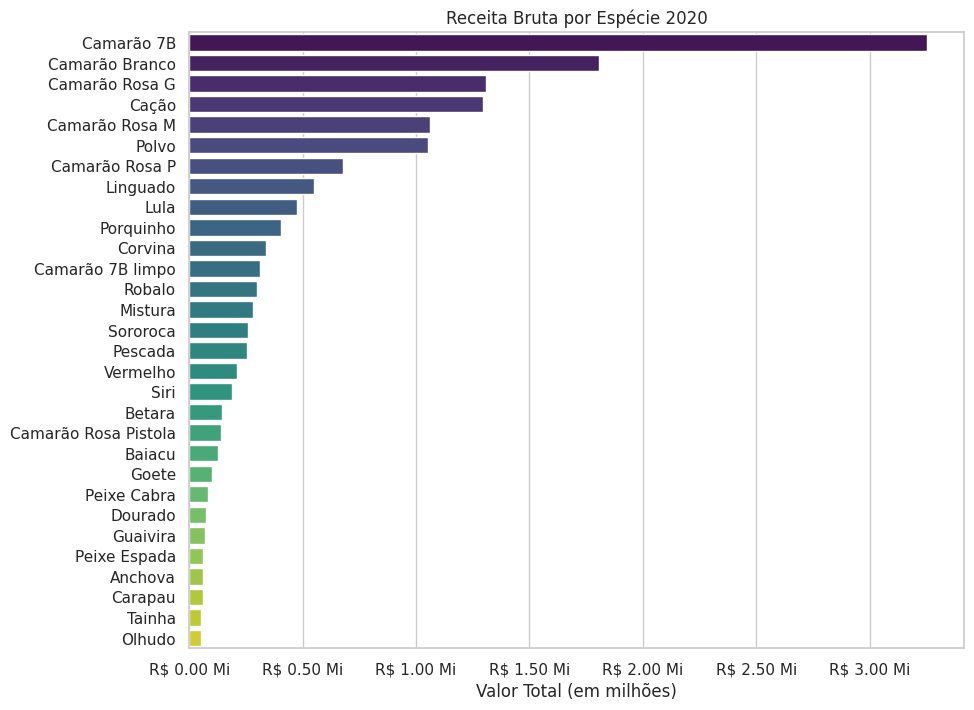

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# Criar um grafico de Valor Total por Espécie

# Calcular o valor total por espécie
valor_total_por_especie = entradas_total_2020.groupby('Espécie')['Valor Total (R$)'].sum().reset_index()

# Converter o valor total  para milhões
valor_total_por_especie['Valor Total (R$) (Milhões)'] = valor_total_por_especie['Valor Total (R$)'] / 1_000_000

# Selecionar apenas as 30 primeiras linhas e ordenar em ordem decrescente
valor_total_por_especie = valor_total_por_especie.nlargest(30, 'Valor Total (R$)')

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Valor Total (R$) (Milhões)', y='Espécie', data=valor_total_por_especie, palette='viridis')

# Definir o formato do eixo x para mostrar os valores em milhões
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: 'R$ {:,.2f} Mi'.format(x)))

plt.title('Receita Bruta por Espécie 2020')
plt.xlabel('Valor Total (em milhões)')
plt.ylabel('')
plt.show()


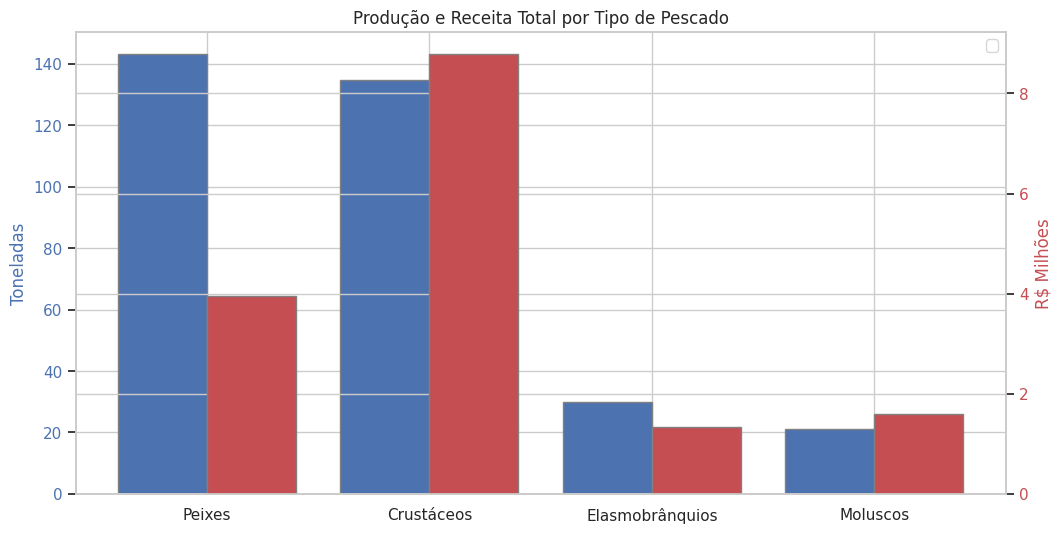

In [76]:
#Criar um grafico para mostrar a Receita Bruta e Produção Total por tipo de pescado
# Agrupando os dados por Classificação e somando Qtd(Kg) e Valor Total (R$)
agrupado = entradas_total_2020.groupby('Classificação').agg({'Qtd(Kg)': 'sum', 'Valor Total (R$)': 'sum'}).reset_index()

# Convertendo a quantidade para toneladas e os valores para milhões
agrupado['Qtd(Ton)'] = agrupado['Qtd(Kg)'] / 1000
agrupado['Valor Total (R$) (Milhões)'] = agrupado['Valor Total (R$)'] / 1000000

# Ordenando os dados do maior para o menor
agrupado = agrupado.sort_values(by='Qtd(Ton)', ascending=False)

# Criando a visualização
fig, ax1 = plt.subplots(figsize=(12, 6))

barWidth = 0.4

r1 = np.arange(len(agrupado['Classificação']))
r2 = [x + barWidth for x in r1]

# Barras para a quantidade (eixo esquerdo)
ax1.bar(r1, agrupado['Qtd(Ton)'], color='b', width=barWidth, edgecolor='grey', label='Quantidade (Ton)')
ax1.set_ylabel('Toneladas', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Eixo direito para o valor total
ax2 = ax1.twinx()
ax2.bar(r2, agrupado['Valor Total (R$) (Milhões)'], color='r', width=barWidth, edgecolor='grey', label='Valor Total (R$) (Milhões)')
ax2.set_ylabel('R$ Milhões', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicionando labels e ticks
ax1.set_xlabel('')
ax1.set_title('Produção e Receita Total por Tipo de Pescado')
ax1.set_xticks([r + barWidth/2 for r in range(len(agrupado['Classificação']))])
ax1.set_xticklabels(agrupado['Classificação'])
ax1.legend('')

# Exibindo o gráfico
plt.show()

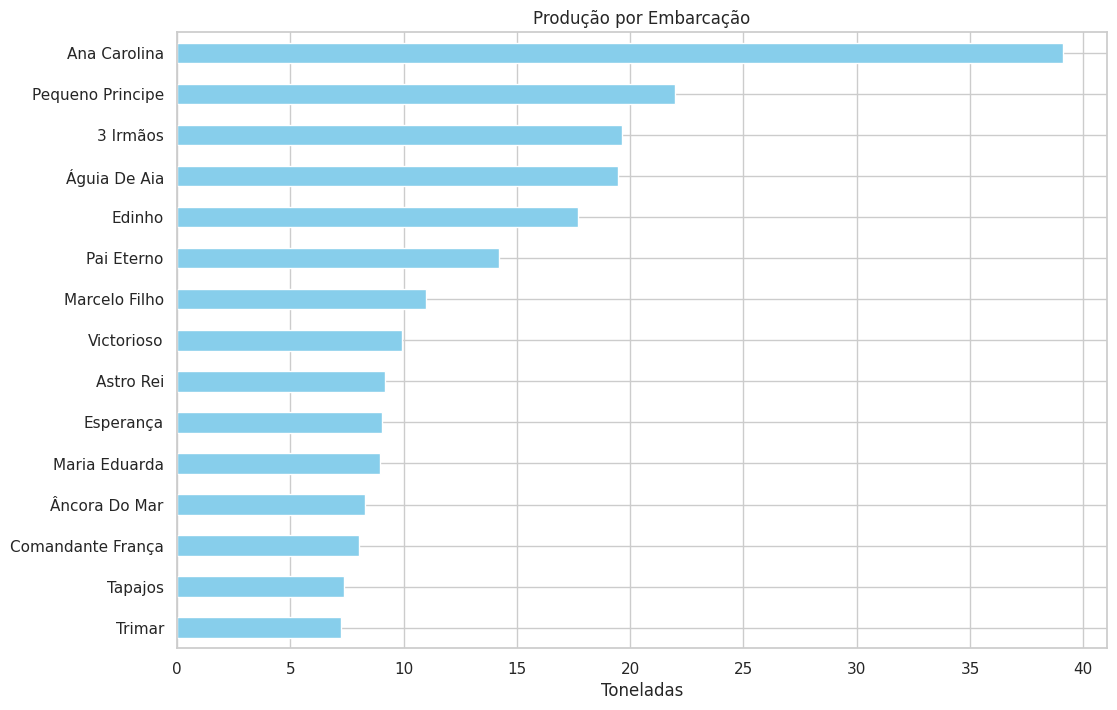

In [78]:
# Agora criar um grafico de Produção por Embarcação

# Convertendo a quantidade para toneladas e os valores para milhões
agrupado['Qtd(Ton)'] = agrupado['Qtd(Kg)'] / 1000

# Agrupando por embarcação e somando a quantidade
top_embarcacoes = entradas_total_2020.groupby('Embarcação')['Qtd(Ton)'].sum().nlargest(15)

# Criando o gráfico
plt.figure(figsize=(12, 8))
top_embarcacoes.plot(kind='barh', color='skyblue')
plt.xlabel('Toneladas')
plt.ylabel('')
plt.title('Produção por Embarcação')
plt.gca().invert_yaxis()  # Inverter a ordem das barras para a maior estar no topo
plt.show()

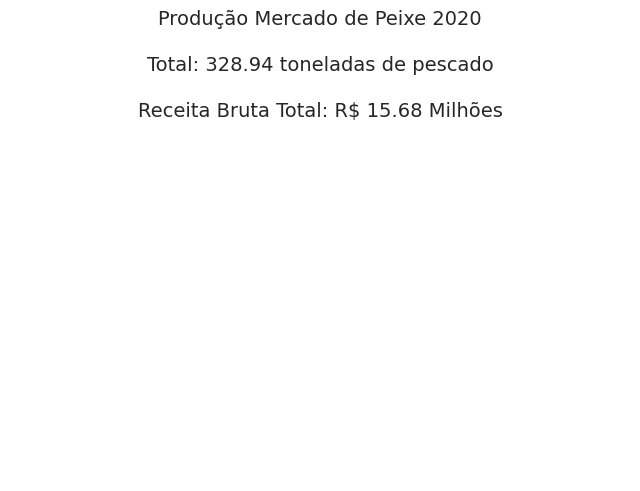

In [83]:
#Por fim calcular a Produção Total e Receita Bruta do Mercado de Peixe em 2020

# Calculando a quantidade total em toneladas e o valor total em milhões
qtd_total_ton = entradas_total_2020['Qtd(Kg)'].sum() / 1000  # Convertendo de Kg para Ton
valor_total_milhoes = entradas_total_2020['Valor Total (R$)'].sum() / 1_000_000  # Convertendo de R$ para Milhões

# Criando o cartão
fig, ax = plt.subplots(figsize=(8, 6))

# Configurando o estilo do cartão
ax.set_facecolor('#f0f0f0')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Adicionando textos ao cartão
ax.text(0.5, 1.0, f"Produção Mercado de Peixe 2020", ha='center', va='center', fontsize=14)
ax.text(0.5, 0.9, f"Total: {qtd_total_ton:.2f} toneladas de pescado", ha='center', va='center', fontsize=14)
ax.text(0.5, 0.8, f"Receita Bruta Total: R$ {valor_total_milhoes:.2f} Milhões", ha='center', va='center', fontsize=14)

plt.show()

In [84]:
# Salvando em CSV
entradas_total_2020.to_csv('entradas_total_2020.csv', index=False)

# Salvando em XLSX
entradas_total_2020.to_excel('entradas_total_2020.xlsx', index=False)